# Some univariate polynomial benchmarks
[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/nthiery/shared-sage-notebooks/master?filepath=2018-03-28-AlanSokal-TimingPolynomials.ipynb)
For an application to the computation of implicitly defined series with polynomial coefficients,
Alan Sokal was interested in how Mathematica and SageMath compared on arithmetic of
large univariate polynomials with large integer coefficients.
So we did together the following basic benchmarking of Sage's univariate polynomials (actually FLINT).

In [1]:
import time
def f(p, n):
    """
    Return p^{2^n} together with timing
    """
    times = []
    t = time.clock()
    for i in range(n):
        p = p*p
        t2 = time.clock()
        times.append(t2-t)
        print i, t2-t
        t = t2
    return p, times

In [2]:
P = ZZ['x']

In [3]:
x = P.gen()

In [4]:
p = 2*x+3

In [5]:
f(p, 0)

(2*x + 3, [])

In [6]:
f(p,1)

0 1.6e-05


(4*x^2 + 12*x + 9, [1.6000000000016e-05])

In [7]:
p, timings = f(p, 15); timings

0 1.3e-05
1 0.000171
2 0.000326
3 0.000223
4 0.000141
5 0.000128
6 0.000606
7 0.000381
8 0.002856
9 0.003318
10 0.015733
11 0.075643
12 0.323055
13 1.315081
14 5.757541


[1.3000000000040757e-05,
 0.00017099999999992122,
 0.00032599999999982643,
 0.00022300000000008424,
 0.00014100000000016877,
 0.00012799999999968392,
 0.0006059999999998844,
 0.0003810000000004088,
 0.0028559999999999697,
 0.00331799999999971,
 0.015732999999999997,
 0.07564300000000035,
 0.32305499999999965,
 1.3150809999999997,
 5.757541000000001]

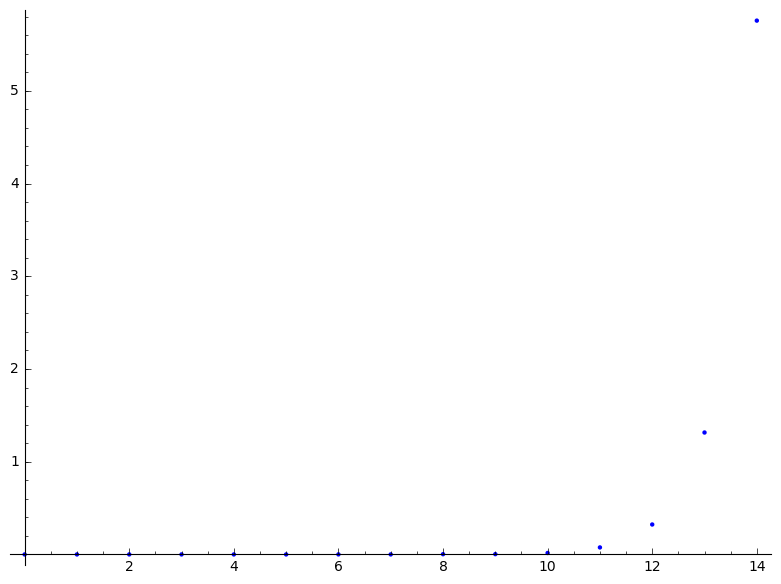

In [11]:
points(enumerate(timings))

We could not computer further, because running out of memory.

**Interpretation**: the main limitation for computing with polynomials with large coefficients is the memory size.

In [2]:
def pone(n):
    """Returns 1+x+...+x^k"""
    return P([1]*n)

In [33]:
n = 23
p = pone(2^n)
%time _ = p*p;

CPU times: user 1.47 s, sys: 124 ms, total: 1.59 s
Wall time: 1.59 s


In [30]:
n = 24
p = pone(2^n)
%time _ = p*p;

CPU times: user 3.18 s, sys: 212 ms, total: 3.39 s
Wall time: 3.39 s


In [31]:
n = 25
p = pone(2^n)
%time _ = p*p;

CPU times: user 6.66 s, sys: 444 ms, total: 7.11 s
Wall time: 7.11 s


**Interpretation**: for polyomials with small coefficients, the complexity of multiplication is roughly linear in the degree.